In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import Nio
print (Nio.__version__)
#import sklearn

print("python version:")
import platform
print(platform.python_version())

1.5.0
python version:
2.7.14


In [3]:
sstdat = xr.open_dataset('http://apdrc.soest.hawaii.edu/dods/public_data/NOAA_SST/ERSST/monthly_v5')
#sstdat
sst = sstdat['sst']
sst

#note: lat & lon go by scale of 2 degrees

<xarray.DataArray 'sst' (time: 2004, lat: 89, lon: 180)>
[32104080 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 1854-03-01 ...
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
Attributes:
    long_name:  extended reconstructed sea surface temperature [degree c] 

In [4]:
slpdat = xr.open_dataset('slp.mnmean.real.nc')
#slpdat
slp = slpdat['slp']
slp



#note: lat & lon go by scale of 5 degrees

<xarray.DataArray 'slp' (time: 2029, lat: 37, lon: 72)>
[5405256 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 90.0 85.0 80.0 75.0 70.0 65.0 60.0 55.0 50.0 45.0 ...
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 1850-03-01 ...
Attributes:
    long_name:             Monthly Mean Sea Level Pressure
    unpacked_valid_range:  [ 850. 1400.]
    actual_range:          [ 953.9066 1052.5088]
    units:                 mb
    precision:             1
    var_desc:              Sea Level Pressure
    dataset:               HadSLP2
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Individual Observation
    valid_range:           [-32765  32765]

In [5]:
year = []
jan = []
feb = []
mar = []
apr = []
may = []
jun = []
jul = []
aug = []
sept = []
octo = []
nov = []
dec = []

with open('8-all_ind.txt') as f:
    for line in f:
        data = line.split()
        year.append(int(data[0]))
        jan.append(float(data[1]))
        feb.append(float(data[2]))
        mar.append(float(data[3]))
        apr.append(float(data[4]))
        may.append(float(data[5]))
        jun.append(float(data[6]))
        jul.append(float(data[7]))
        aug.append(float(data[8]))
        sept.append(float(data[9]))
        octo.append(float(data[10]))
        nov.append(float(data[11]))
        dec.append(float(data[12]))
rainfall = []
for x in range(194):
    precipSum = jun[x] + jul[x] + aug[x] + sept[x]
    rainfall.append(float(precipSum))
    #rainfall.append(float(jan[x]))
print(rainfall)

[840.5, 837.4000000000001, 895.3999999999999, 894.1999999999999, 976.4000000000001, 1036.2, 864.9000000000001, 912.2, 887.4000000000001, 960.4, 795.5, 770.2, 920.9, 978.7, 977.2, 891.4, 817.4000000000001, 779.1, 962.3, 775.1, 819.3000000000001, 882.7, 954.1, 848.3999999999999, 804.7, 697.5, 882.7, 773.8, 902.2, 931.1, 807.8, 787.6999999999999, 847.4, 939.0, 847.2, 688.0, 798.2, 863.5, 744.0, 880.6999999999999, 800.3, 936.3, 745.3999999999999, 899.6, 830.6, 813.5, 912.8000000000001, 733.0999999999999, 1051.2, 966.1000000000001, 941.2, 747.6, 821.0999999999999, 847.9, 962.9, 777.3000000000001, 862.4, 972.5, 959.9, 969.1000000000001, 819.5000000000001, 1033.2, 996.8999999999999, 830.5999999999999, 609.4000000000001, 1039.8, 974.7, 863.7, 901.1, 962.5, 868.8, 967.1, 926.5, 935.2, 960.1, 903.9000000000001, 990.1, 985.9, 843.1, 1050.2, 991.9999999999999, 1031.9, 856.7, 842.4000000000001, 960.2, 942.8, 694.6, 952.8, 771.6, 857.1, 896.0, 813.0999999999999, 747.9, 946.1, 804.9000000000001, 931.

In [6]:
#EP-ENSOpredictor

'''set #1'''
latrange1 = sst.sel(lat = slice(-20, 5)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst.sel(lat = slice(-20, 5), lon = slice(150, 170), time = (sst['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1900-03-01', '2017-03-01'))

marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#marchmean1

marchcalculation1 = (marchdata1.sel(time = slice('1900-03-01', '1988-03-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst.sel(lat = slice(-20, 5), lon = slice(150, 170), time = (sst['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2017-05-01'))

maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#maymean1

maycalculation1 = (maydata1.sel(time = slice('1900-05-01', '1988-05-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
marchcalculation1.time.data = maycalculation1.time.data

DSST1 = maymean1 - marchmean1
#DSST1

DSSTcalculation1 = maycalculation1 - marchcalculation1

'''set #2'''
latrange2 = sst.sel(lat = slice(-10, 10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst.sel(lat = slice(-10, 10), lon = slice(250, 280), time = (sst['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1900-03-01', '2017-03-01'))

marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#marchmean2

marchcalculation2 = (marchdata2.sel(time = slice('1900-03-01', '1988-03-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = sst.sel(lat = slice(-10, 10), lon = slice(250, 280), time = (sst['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2017-05-01'))

maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#maymean2

maycalculation2 = (maydata2.sel(time = slice('1900-05-01', '1988-05-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

marchmean2.time.data = maymean2.time.data
marchcalculation2.time.data = maycalculation2.time.data

DSST2 = (maymean2 - marchmean2)
#DSST2

DSSTcalculation2 = maycalculation2 - marchcalculation2

EPT = DSST1 - DSST2
print (EPT)

EPTcalculation = DSSTcalculation1 - DSSTcalculation2
print (EPTcalculation)

<xarray.DataArray (time: 118)>
array([-0.106976, -0.251422, -1.241294,  0.465158, -1.274338, -0.671393,
        1.274047, -0.189429,  0.528859, -0.089656,  0.147374, -1.059527,
        0.824667,  0.150025,  0.081377, -0.517326,  0.272274, -0.42827 ,
       -0.51721 , -0.281727,  0.653641, -0.359796,  0.081853, -0.480328,
        0.090991,  0.007025,  0.051119, -0.142069, -0.092793, -0.492864,
       -0.52233 ,  0.776279, -1.043112,  0.165787,  0.028621, -0.900746,
       -0.085271,  0.255577,  0.451604, -0.848844, -0.346591, -0.163078,
        1.110234, -0.314664,  0.009127, -0.449154, -0.093069,  0.912869,
        1.134274, -0.336539,  0.098147, -0.332115,  0.644082, -0.29495 ,
        0.966212,  0.230685,  0.715894, -0.624445, -0.318119,  0.709384,
        0.509534,  0.216731, -0.150298, -0.065253,  1.073105, -0.991001,
       -0.034543, -0.251549, -0.198961, -0.488072,  0.00334 , -0.066313,
       -0.905693,  0.526287, -0.49546 ,  0.482486, -0.534162,  0.266194,
        0.336988, -0

In [7]:
EPT = (DSST1 - DSST2) - EPTcalculation.mean()
EPTstd = 0.546494
EPT = EPT / EPTstd
EPT

<xarray.DataArray (time: 118)>
array([-0.129449, -0.393763, -2.205077,  0.917469, -2.265542, -1.162246,
        2.397611, -0.280326,  1.034031, -0.097756,  0.335973, -1.872471,
        1.575314,  0.340823,  0.215208, -0.880325,  0.564521, -0.717368,
       -0.880115, -0.449216,  1.262363, -0.59207 ,  0.21608 , -0.812625,
        0.232801,  0.079156,  0.15984 , -0.193664, -0.103495, -0.835565,
       -0.889484,  1.486772, -1.842434,  0.369666,  0.118674, -1.581926,
       -0.089732,  0.533967,  0.892666, -1.486953, -0.567908, -0.232107,
        2.097859, -0.509486,  0.083002, -0.755582, -0.104002,  1.736711,
        2.141847, -0.549514,  0.245895, -0.541418,  1.244872, -0.473413,
        1.834321,  0.488419,  1.376278, -1.076338, -0.515807,  1.364365,
        0.99867 ,  0.462885, -0.208721, -0.053102,  2.029918, -1.747079,
        0.003093, -0.393995, -0.297766, -0.826796,  0.072413, -0.055042,
       -1.590978,  1.029325, -0.840315,  0.949175, -0.911133,  0.553395,
        0.682937, -1

In [8]:
#CP-ENSOpredictor

'''set #1'''
latrange1= sst.sel(lat = slice(-25, -10)).lat
weights1= np.cos(latrange1*np.pi/180)

aprildata1= sst.sel(lat = slice(-25, -10), lon = slice(170, 200), time = (sst['time.month']==4))
aprilSST1= aprildata1.sel(time = slice('1900-04-01', '2017-04-01'))

aprilmean1= (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#aprilmean1

aprilcalculation1 = (aprildata1.sel(time = slice('1900-04-01', '1988-04-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1= sst.sel(lat = slice(-25, -10), lon = slice(170, 200), time = (sst['time.month']==5))
maySST1= maydata1.sel(time = slice('1900-05-01', '2017-05-01'))

maymean1= (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#maymean1

maycalculation1 = (maydata1.sel(time = slice('1900-05-01', '1988-05-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

aprilmean1.time.data = maymean1.time.data
aprilcalculation1.time.data = maycalculation1.time.data

DSST1 = maymean1 - aprilmean1
#DSST1

DSSTcalculation1 = maycalculation1 - aprilcalculation1

'''set #2'''
latrange2= sst.sel(lat = slice(5, 20)).lat
weights2= np.cos(latrange2*np.pi/180)

aprildata2= sst.sel(lat = slice(5, 20), lon = slice(180, 210), time = (sst['time.month']==4))
aprilSST2= aprildata2.sel(time = slice('1900-04-01', '2017-04-01'))

aprilmean2= (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#aprilmean2

aprilcalculation2 = (aprildata2.sel(time = slice('1900-04-01', '1988-04-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2= sst.sel(lat = slice(5, 20), lon = slice(180, 210), time = (sst['time.month']==5))
maySST2= maydata2.sel(time = slice('1900-05-01', '2017-05-01'))

maymean2= (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#maymean2

maycalculation2 = (maydata2.sel(time = slice('1900-05-01', '1988-05-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

aprilmean2.time.data = maymean2.time.data
aprilcalculation2.time.data = maycalculation2.time.data

DSST2 = maymean2 - aprilmean2
#DSST2

DSSTcalculation2 = maycalculation2 - aprilcalculation2

CPT = DSST1 - DSST2
print (CPT)

CPTcalculation = DSSTcalculation1 - DSSTcalculation2

print (CPT.mean())
print (CPTcalculation.mean())

<xarray.DataArray (time: 118)>
array([-0.849155, -1.486921, -1.143121, -1.033298, -1.45798 , -1.585492,
       -1.02882 , -0.840201, -0.97147 , -0.743902, -1.77659 , -1.124135,
       -1.023065, -0.717028, -1.16801 , -1.187914, -1.101848, -0.608028,
       -1.005963, -1.1634  , -1.619158, -1.016702, -1.054611, -1.019223,
       -1.081166, -1.116747, -0.982662, -0.99921 , -0.966194, -1.145223,
       -1.184758, -1.083666, -0.67092 , -0.943524, -1.153415, -1.026588,
       -1.176003, -1.125668, -0.901866, -0.707016, -0.913175, -1.193116,
       -1.083845, -0.779773, -1.000695, -1.467114, -1.270029, -0.944824,
       -1.525849, -1.268549, -1.356658, -1.60923 , -1.055757, -1.22592 ,
       -1.070093, -0.944811, -0.670137, -0.985793, -0.980017, -0.872251,
       -1.074058, -0.73188 , -1.044071, -0.776829, -0.727156, -1.429415,
       -1.416999, -1.195584, -0.931289, -1.25606 , -0.6078  , -0.934107,
       -1.173827, -1.329571, -1.13584 , -0.963596, -1.097996, -0.897503,
       -0.739348, -0

In [9]:
CPT = (DSST1 - DSST2) - CPTcalculation.mean()
CPTstd = 0.243743
CPT = CPT / CPTstd
CPT

<xarray.DataArray (time: 118)>
array([ 0.977013, -1.639538, -0.229035,  0.221533, -1.520802, -2.043943,
        0.239905,  1.013748,  0.475193,  1.408834, -2.827955, -0.151141,
        0.263516,  1.51909 , -0.331148, -0.412807, -0.059706,  1.966284,
        0.333681, -0.312232, -2.182061,  0.289623,  0.134092,  0.279279,
        0.025146, -0.120831,  0.429276,  0.361386,  0.496839, -0.23766 ,
       -0.39986 ,  0.014892,  1.708254,  0.589848, -0.271266,  0.249062,
       -0.36394 , -0.157429,  0.760759,  1.560164,  0.714362, -0.434148,
        0.014154,  1.261668,  0.355295, -1.558273, -0.749696,  0.584515,
       -1.799246, -0.743624, -1.105108, -2.141332,  0.129393, -0.568731,
        0.070574,  0.584566,  1.711469,  0.416434,  0.440129,  0.88226 ,
        0.054309,  1.458157,  0.177338,  1.273747,  1.477539, -1.403608,
       -1.352668, -0.444276,  0.640044, -0.692388,  1.967218,  0.628481,
       -0.355013, -0.993982, -0.199165,  0.5075  , -0.043903,  0.778657,
        1.427517,  0

In [10]:
'''set #1'''
latrange1 = slp.sel(lat = slice(-10, -40)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==4))
aprilSLP1 = aprildata1.sel(time = slice('1900-04-01', '2017-04-01'))

aprilmean1 = (aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean()
#aprilmean1

aprilcalculation1 = ((aprildata1.sel(time = slice('1900-04-01', '1988-04-01')))*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1900-05-01', '2017-05-01'))

maymean1 = (maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean()
#maymean1

maycalculation1 = ((maydata1.sel(time = slice('1900-05-01', '1988-05-01')))*weights1).mean({'lon', 'lat'})/weights1.mean()

aprilmean1.time.data = maymean1.time.data
aprilcalculation1.time.data = maycalculation1.time.data

NP = ((aprilmean1 + maymean1)/2)
#NP

NPcalculation = ((aprilcalculation1 + maycalculation1)/2)

'''set#2'''
latrange2 = slp.sel(lat = slice(30, 10)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1900-04-01', '2017-04-01'))

aprilmean2 = (aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean()
#aprilmean2

aprilcalculation2 = ((aprildata2.sel(time = slice('1900-04-01', '1988-04-01')))*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1900-05-01', '2017-05-01'))

maymean2 = (maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean()
#maymean2

maycalculation2 = ((maydata2.sel(time = slice('1900-05-01', '1988-05-01')))*weights2).mean({'lon', 'lat'})/weights2.mean()

aprilmean2.time.data = maymean2.time.data
aprilcalculation2.time.data = maycalculation2.time.data

SP = ((aprilmean2 + maymean2)/2)
#SP

SPcalculation = ((aprilcalculation2 + maycalculation2)/2)

#30*weigths
NParea = (30*weights1.mean() * 60)
SParea = (20*weights2.mean() * 50)
PSH = ((NP * NParea) + (SP * SParea))/(NParea + SParea)
print (PSH)

PSHcalculation = ((NPcalculation * NParea) + (SPcalculation * SParea))/(NParea + SParea)
#confirm that this is how you calculate the PSH

<xarray.DataArray (time: 118)>
array([1015.119197, 1015.668121, 1015.408852, 1016.140947, 1015.763238,
       1015.354879, 1016.411033, 1015.534686, 1016.527536, 1016.570861,
       1016.192939, 1016.412149, 1016.604459, 1015.77167 , 1016.057837,
       1014.795294, 1016.356689, 1016.934404, 1015.841661, 1015.827908,
       1015.768014, 1015.599573, 1015.927862, 1015.637028, 1016.273389,
       1016.107064, 1015.699571, 1015.478212, 1016.313443, 1015.50045 ,
       1015.437417, 1015.760965, 1015.598903, 1016.592758, 1016.167544,
       1015.028528, 1015.948686, 1016.070284, 1016.769433, 1016.053114,
       1015.370472, 1015.940284, 1016.045202, 1015.816421, 1015.838343,
       1015.477238, 1016.275673, 1016.233476, 1015.871991, 1015.995817,
       1015.922453, 1015.269518, 1015.905603, 1015.972663, 1015.577921,
       1016.915915, 1016.704687, 1015.687749, 1015.316611, 1015.344596,
       1015.916282, 1015.863214, 1016.618729, 1015.908842, 1016.169045,
       1015.864918, 1015.135309, 

In [11]:
temp = PSH - PSHcalculation.mean()
PSHstd = 0.430541
PSH = temp / PSHstd
print (PSH)

<xarray.DataArray (time: 118)>
array([-1.808928, -0.533965, -1.136158,  0.564249, -0.313039, -1.261518,
        1.191568, -0.843887,  1.462165,  1.562794,  0.685009,  1.194159,
        1.640829, -0.293454,  0.371214, -2.561245,  1.065345,  2.407179,
       -0.13089 , -0.162833, -0.301948, -0.693177,  0.069327, -0.606182,
        0.871866,  0.48555 , -0.460915, -0.975057,  0.964899, -0.923406,
       -1.069811, -0.318318, -0.694733,  1.613652,  0.626025, -2.01952 ,
        0.117693,  0.400123,  2.024009,  0.360244, -1.225301,  0.098178,
        0.341866, -0.189514, -0.138596, -0.97732 ,  0.877172,  0.779162,
       -0.060444,  0.227162,  0.056763, -1.459782,  0.017626,  0.173384,
       -0.743468,  2.364237,  1.873625, -0.488374, -1.350401, -1.285403,
        0.04243 , -0.080829,  1.673974,  0.025149,  0.629511, -0.076871,
       -1.771505,  0.846201, -0.948346, -0.811334,  0.242795,  0.605242,
       -0.582109,  0.288304, -0.250897,  0.188308,  0.572122, -0.128759,
       -0.919371, -1

In [12]:
#AnomalousAsianLowpredictor

latrange = slp.sel(lat = slice(60, 40)).lat
weights = np.cos(latrange*np.pi/180)

marchdata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==3))
marchSLP = marchdata.sel(time = slice('1900-03-01', '2017-03-01'))

marchmean = (marchSLP*weights).mean({'lon', 'lat'})/weights.mean()
#marchmean

maydata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==5))
maySLP = maydata.sel(time = slice('1900-05-01', '2017-05-01'))

maymean = (maySLP*weights).mean({'lon', 'lat'})/weights.mean()
#maymean

marchcalculation = ((marchdata.sel(time = slice('1900-03-01', '1988-03-01')))*weights).mean({'lon', 'lat'})/weights.mean()
maycalculation = ((maydata.sel(time = slice('1900-05-01', '1988-05-01')))*weights).mean({'lon', 'lat'})/weights.mean()

marchmean.time.data = maymean.time.data
marchcalculation.time.data = maycalculation.time.data

NAT = maymean - marchmean
print (NAT)

NATcalculation =maycalculation - marchcalculation

<xarray.DataArray (time: 118)>
array([-14.617926, -11.958234,  -9.98853 , -10.136464, -11.504354, -13.619555,
       -12.392316, -13.279503, -11.977518, -13.429471, -11.829703, -12.582917,
       -12.337482, -11.80808 , -10.085807, -13.900622, -14.297699, -13.319528,
       -11.713628, -11.04373 , -10.777855, -12.286595, -11.292123, -10.96841 ,
       -16.358334, -13.410957, -15.229524, -11.583   , -12.319581, -13.921819,
       -13.474065, -11.245134, -14.665698, -12.359903, -12.939205, -10.972927,
       -15.610117, -12.990413, -12.870013, -12.328839, -13.515498, -10.578895,
       -10.104391, -11.723012, -13.578889, -14.474454, -12.769607, -14.811889,
       -11.130769, -15.566349, -13.321251, -12.663921, -11.504653, -11.624412,
       -14.530634, -13.888045, -15.109338, -14.304265, -10.927122, -12.19689 ,
       -11.73518 , -14.418186, -13.091266, -13.479216, -10.872852, -14.716221,
        -9.98844 , -12.758047,  -8.916815, -14.697646, -16.87485 , -15.357877,
       -14.408097, -1

In [13]:
NAT = maymean - marchmean - NATcalculation.mean()
NATstd = 1.648686
NAT = NAT / NATstd
NAT

<xarray.DataArray (time: 118)>
array([-1.03611 ,  0.577109,  1.77182 ,  1.682092,  0.852407, -0.430555,
        0.313819, -0.224298,  0.565413, -0.315261,  0.655069,  0.198211,
        0.347078,  0.668184,  1.712817, -0.601034, -0.841879, -0.248576,
        0.725473,  1.131795,  1.29306 ,  0.377944,  0.981134,  1.17748 ,
       -2.091744, -0.304031, -1.407071,  0.804704,  0.357936, -0.613891,
       -0.342309,  1.009635, -1.065087,  0.333479, -0.017893,  1.174741,
       -1.637917, -0.048953,  0.024075,  0.352321, -0.36744 ,  1.413738,
        1.701546,  0.719781, -0.405889, -0.949088,  0.084976, -1.153758,
        1.079003, -1.611371, -0.24962 ,  0.149079,  0.852226,  0.779586,
       -0.983164, -0.593406, -1.334174, -0.845861,  1.202523,  0.432353,
        0.712401, -0.914959, -0.110125, -0.345433,  1.23544 , -1.09573 ,
        1.771875,  0.091987,  2.421862, -1.084464, -2.405034, -1.484923,
       -0.90884 , -0.026011, -1.130272,  0.838096, -1.576365, -0.791986,
       -0.180628,  0

In [14]:
AIRI = 0.47*EPT + 0.19*CPT + 0.23*PSH - 0.24*NAT
AIRI

<xarray.DataArray (time: 118)>
array([-0.042596, -0.757899, -1.766456,  0.199377, -1.630334, -1.121421,
        1.371203, -0.079403,  0.77688 ,  0.656838, -0.379069, -0.681692,
        1.084558,  0.220955, -0.287467, -0.937024,  0.701061,  0.64974 ,
       -0.554473, -0.579538, -0.201064, -0.473382, -0.092492, -0.750888,
        0.816742,  0.198889,  0.388374, -0.439751,  0.181779, -0.502921,
       -0.657933,  0.386087, -0.445543,  0.576919,  0.152516, -1.442611,
        0.308847,  0.32483 ,  1.023841, -0.404138, -0.324822, -0.508294,
        0.658941, -0.216077,  0.172053, -0.648198, -0.009967,  1.383421,
        0.391949,  0.039416, -0.021435, -1.032848,  0.409194, -0.477785,
        0.940502,  1.026816,  1.723165, -0.336076, -0.758003,  0.409474,
        0.318476,  0.695605,  0.347039,  0.305742,  1.083076, -0.842518,
       -1.088249, -0.097041, -0.817708, -0.446483,  1.040857,  0.589129,
       -0.730976,  0.367479, -0.21923 ,  0.384705,  0.073341,  0.568503,
        0.424104, -0

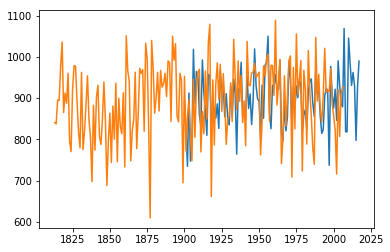

In [15]:
final = AIRI * np.std(rainfall) + np.mean(rainfall)
#AIRIrainfall = final['foo']
#final.plot()
plt.plot(np.arange(1900,2018,1),final)
plt.plot(year,rainfall)

In [16]:
#data = xr_extras.csv.to_csv('calculated.csv')
    #xr.open_dataset('calculated.csv')
data = pd.read_csv('calculated1900-2016.csv')
# xr.open_dataset('calculated.csv')
calculatedModelPaper = data.values
calculatedModelPaper

array([[1920.7       ,  813.4715229 ],
       [1920.75      ,  813.58616951],
       [1920.8       ,  813.50953136],
       ...,
       [2015.9       ,  831.91944467],
       [2015.95      ,  835.85110232],
       [2016.        ,  838.34435786]])

In [17]:
data1 = pd.read_csv('observed1900-2015.csv')
observedRainfallPaper = data1.values
observedRainfallPaper

array([[1900.25      ,  837.00742662],
       [1900.3       ,  827.07293161],
       [1900.35      ,  817.82713826],
       ...,
       [2014.9       ,  727.47138274],
       [2014.95      ,  727.57059845],
       [2015.        ,  729.19400069]])

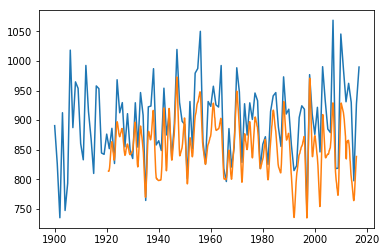

In [48]:
plt.plot(np.arange(1900,2018,1),(final.data))
plt.plot(calculatedModelPaper[:,0],calculatedModelPaper[:,1])
#plt.plot(observedRainfallPaper[:,0],observedRainfallPaper[:,1])

In [ ]:
# Copyright (c) 2020 Medha Palavalli.